In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from warnings import filterwarnings
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf 
filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_excel("Dataset.xlsx")
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
13913,2021-07-15 00:00:00,1832,NaN,NaN,NaN
13914,2021-07-16 00:00:00,1822,NaN,NaN,NaN
13915,2021-07-19 00:00:00,1803.25,NaN,NaN,NaN
13916,2021-07-20 00:00:00,1815.3,NaN,NaN,NaN


In [3]:
data.head(12)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,GOLDAMGBD228NLBM,Gold Fixing Price 10:30 A.M. (London time) in ...,NaN,NaN,
7,NaN,NaN,NaN,NaN,NaN
8,Frequency: Daily,NaN,NaN,NaN,NaN
9,observation_date,GOLDAMGBD228NLBM,NaN,NaN,NaN


##### The data looks like it starts from 10th row

In [4]:
# Replacing the data variable with the proper data

data = pd.read_excel("Dataset.xlsx", skiprows=list(range(0,10)), index_col=0, parse_dates=True)
data

,GOLDAMGBD228NLBM,Unnamed: 2,Unnamed: 3,Unnamed: 4
observation_date,,,,
1968-04-01,38.00,NaN,NaN,NaN
1968-04-02,37.60,NaN,NaN,NaN
1968-04-03,37.70,NaN,NaN,NaN
1968-04-04,36.70,NaN,NaN,NaN
1968-04-05,37.20,NaN,NaN,NaN
...,...,...,...,...
2021-07-15,1832.00,NaN,NaN,NaN
2021-07-16,1822.00,NaN,NaN,NaN
2021-07-19,1803.25,NaN,NaN,NaN


In [5]:
data = data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [6]:
start_date = data.index[0]
end_date = data.index[-1]
dates = pd.date_range(start_date, end_date)
missing = []
nan_data = []

for date in dates:
    if date not in data.index:
        missing.append(date)
        nan_data.append(np.nan)
        
df = pd.DataFrame({"GOLDAMGBD228NLBM": nan_data}, index= missing)

df

,GOLDAMGBD228NLBM
1968-04-06,NaN
1968-04-07,NaN
1968-04-13,NaN
1968-04-14,NaN
1968-04-20,NaN
...,...
2021-07-04,NaN
2021-07-10,NaN
2021-07-11,NaN
2021-07-17,NaN


In [1]:
total_df = pd.concat([data, df])
total_df.sort_index(inplace= True)
total_df


NameError: name 'pd' is not defined

In [8]:
total_df.isnull().sum()

GOLDAMGBD228NLBM    5993
dtype: int64

In [9]:
df = total_df.interpolate(method ='linear', limit_direction ='forward', limit = 100)
df.isnull().sum()

GOLDAMGBD228NLBM    0
dtype: int64

In [10]:
#Let's rename the column to gold to make it easier to access

df.rename(columns={"GOLDAMGBD228NLBM": "gold"}, inplace=True)
df

,gold
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-07-17,1815.75
2021-07-18,1809.50
2021-07-19,1803.25
2021-07-20,1815.30


In [11]:
df.index.names = ['Date']

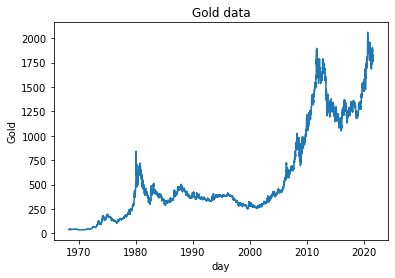

In [12]:
plt.xlabel("day")
plt.ylabel("Gold")
plt.title("Gold data")
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df)


###### Observation: the prices went high near the years 1980, 2010, 2020

In [13]:
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.dayofyear
df["weekday"] = df.index.weekday
df["weekday"] = df["weekday"].astype(int)
df.head()

,gold,year,month,day,weekday
Date,,,,,
1968-04-01,38.0,1968,4,92,0
1968-04-02,37.6,1968,4,93,1
1968-04-03,37.7,1968,4,94,2
1968-04-04,36.7,1968,4,95,3
1968-04-05,37.2,1968,4,96,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19470 entries, 1968-04-01 to 2021-07-21
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gold     19470 non-null  float64
 1   year     19470 non-null  int64  
 2   month    19470 non-null  int64  
 3   day      19470 non-null  int64  
 4   weekday  19470 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 912.7 KB


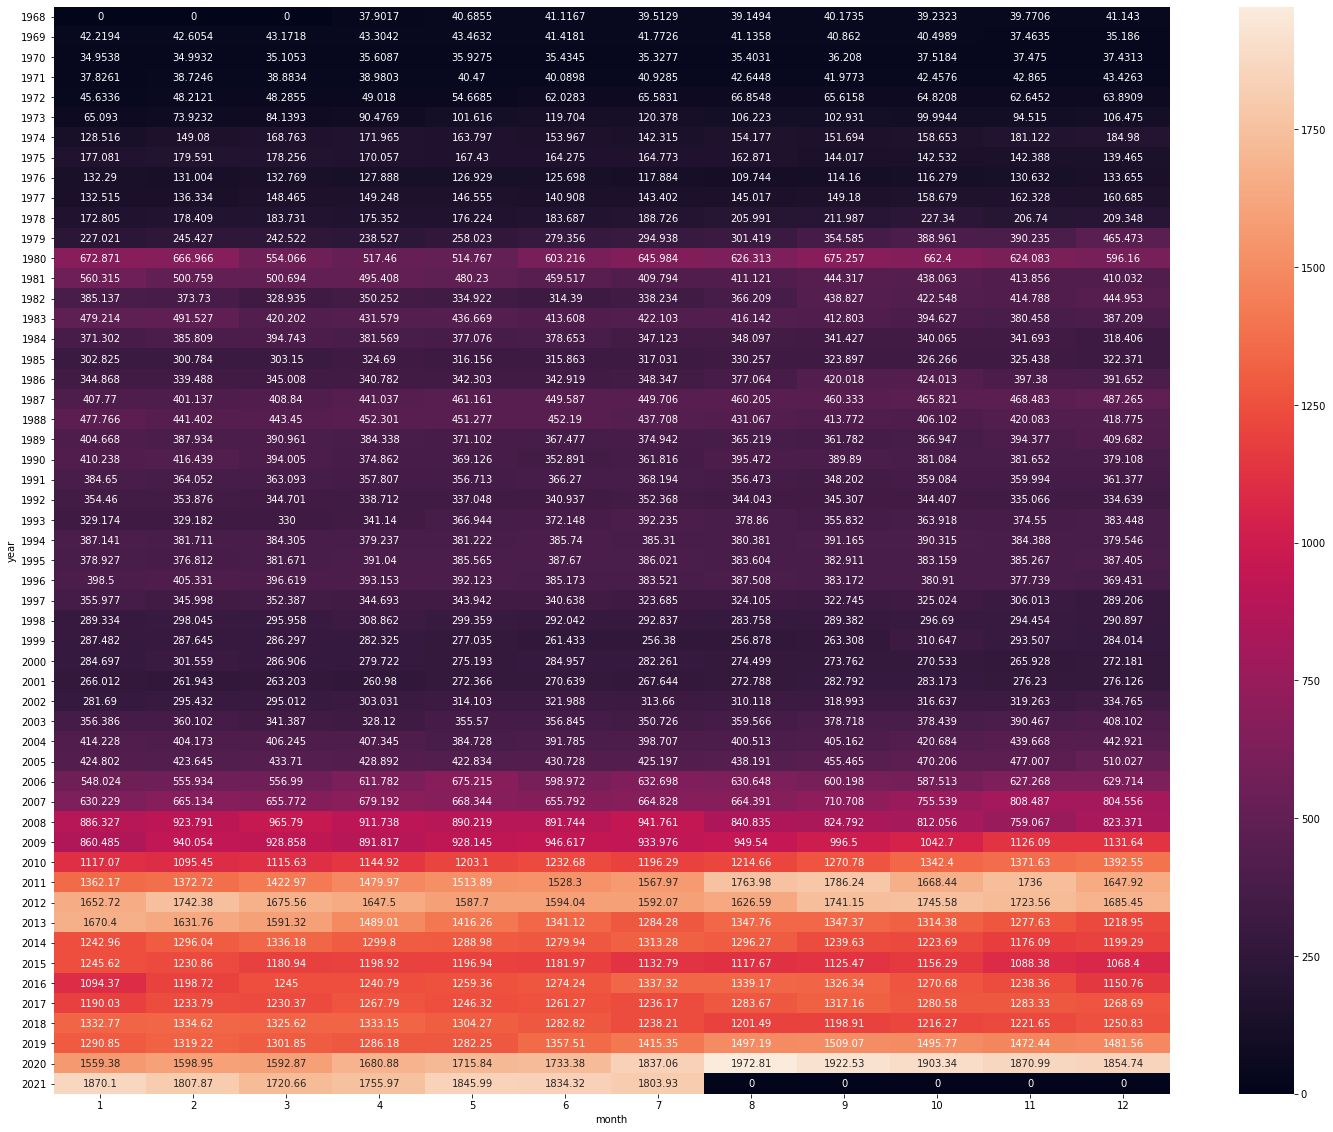

In [15]:
plt.figure(figsize=(25,20))
heatmap_y_month = pd.pivot_table(data=df,values="gold",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

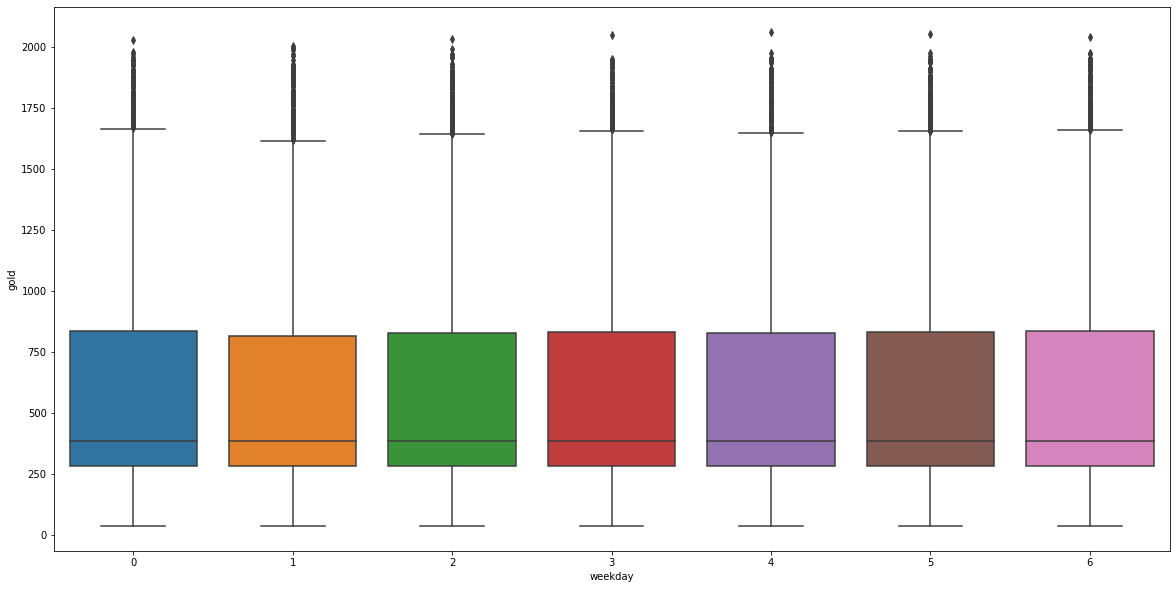

In [16]:
sns.boxplot(x="weekday", y="gold", data=df)

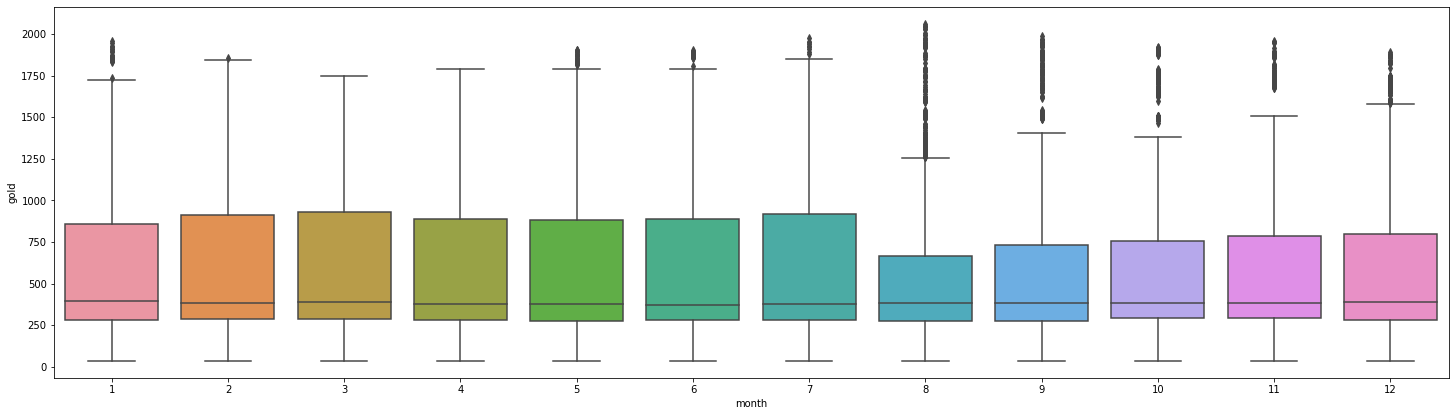

In [17]:
# Boxplot for ever
plt.figure(figsize=(25,15))
plt.subplot(211)
sns.boxplot(x="month",y="gold",data=df)


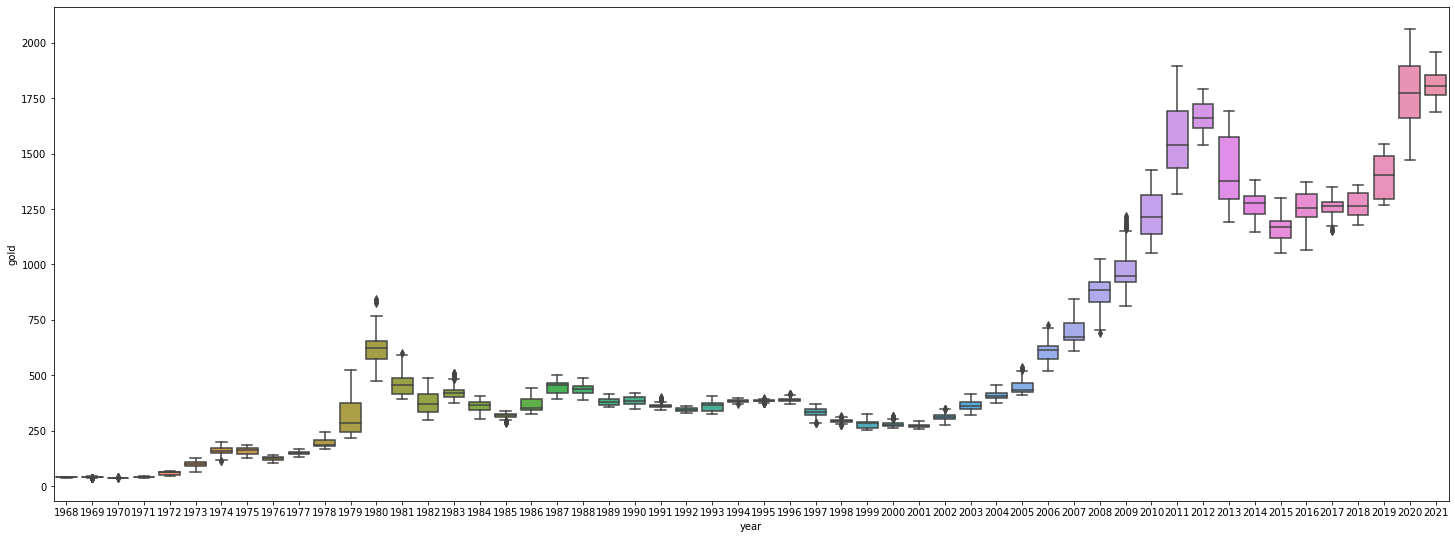

In [18]:
plt.figure(figsize=(25,20))
plt.subplot(212)
sns.boxplot(x="year",y="gold",data=df)

In [19]:
# making a df for regression
dummy_data = pd.get_dummies(df, columns=["weekday"])
df1 =  pd.concat([dummy_data, df], axis=1)
df1.head()

,gold,year,month,day,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,gold,year,month,day,weekday
Date,,,,,,,,,,,,,,,,
1968-04-01,38.0,1968,4,92,1,0,0,0,0,0,0,38.0,1968,4,92,0
1968-04-02,37.6,1968,4,93,0,1,0,0,0,0,0,37.6,1968,4,93,1
1968-04-03,37.7,1968,4,94,0,0,1,0,0,0,0,37.7,1968,4,94,2
1968-04-04,36.7,1968,4,95,0,0,0,1,0,0,0,36.7,1968,4,95,3
1968-04-05,37.2,1968,4,96,0,0,0,0,1,0,0,37.2,1968,4,96,4


In [20]:
df1 = df1.T.drop_duplicates().T

In [21]:
df1["t"] = list(range(1,len(df1)+1))
df1["t_square"] = df1["t"]**2
df1

,gold,year,month,day,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday,t,t_square
Date,,,,,,,,,,,,,,
1968-04-01,38.00,1968.0,4.0,92.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1968-04-02,37.60,1968.0,4.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4
1968-04-03,37.70,1968.0,4.0,94.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3,9
1968-04-04,36.70,1968.0,4.0,95.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4,16
1968-04-05,37.20,1968.0,4.0,96.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-17,1815.75,2021.0,7.0,198.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,19466,378925156
2021-07-18,1809.50,2021.0,7.0,199.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,19467,378964089
2021-07-19,1803.25,2021.0,7.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19468,379003024


In [22]:
df1["log"] = np.log(df1["gold"])
df1

,gold,year,month,day,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday,t,t_square,log
Date,,,,,,,,,,,,,,,
1968-04-01,38.00,1968.0,4.0,92.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,3.637586
1968-04-02,37.60,1968.0,4.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4,3.627004
1968-04-03,37.70,1968.0,4.0,94.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3,9,3.629660
1968-04-04,36.70,1968.0,4.0,95.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4,16,3.602777
1968-04-05,37.20,1968.0,4.0,96.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,5,25,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-17,1815.75,2021.0,7.0,198.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,19466,378925156,7.504254
2021-07-18,1809.50,2021.0,7.0,199.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,19467,378964089,7.500806
2021-07-19,1803.25,2021.0,7.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19468,379003024,7.497346


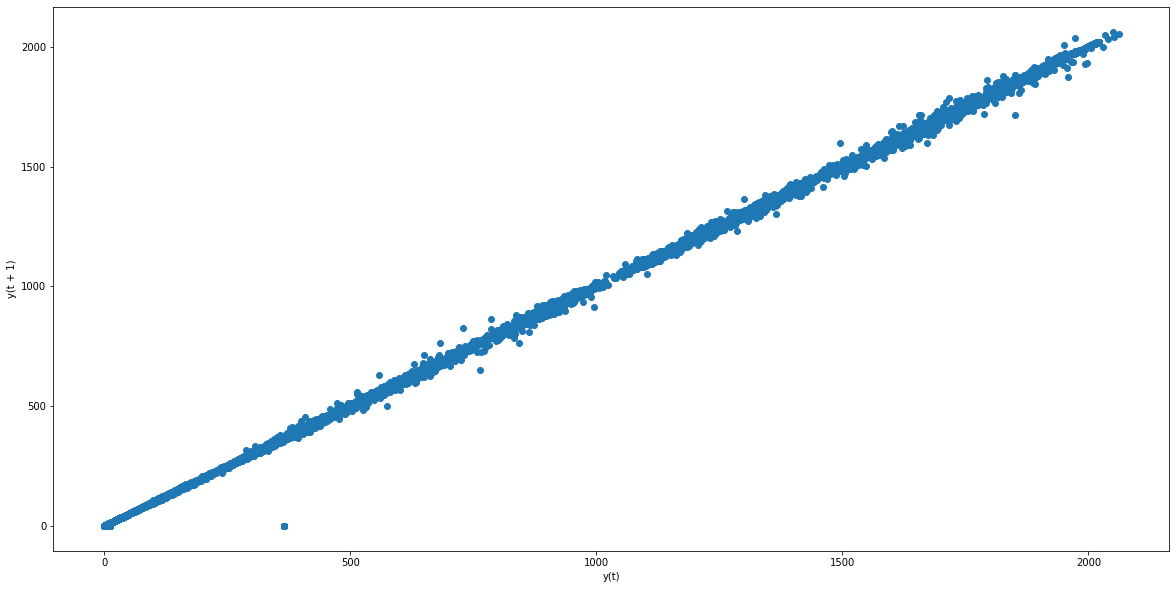

In [23]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(df)
pyplot.show()

## Checking the stationarity

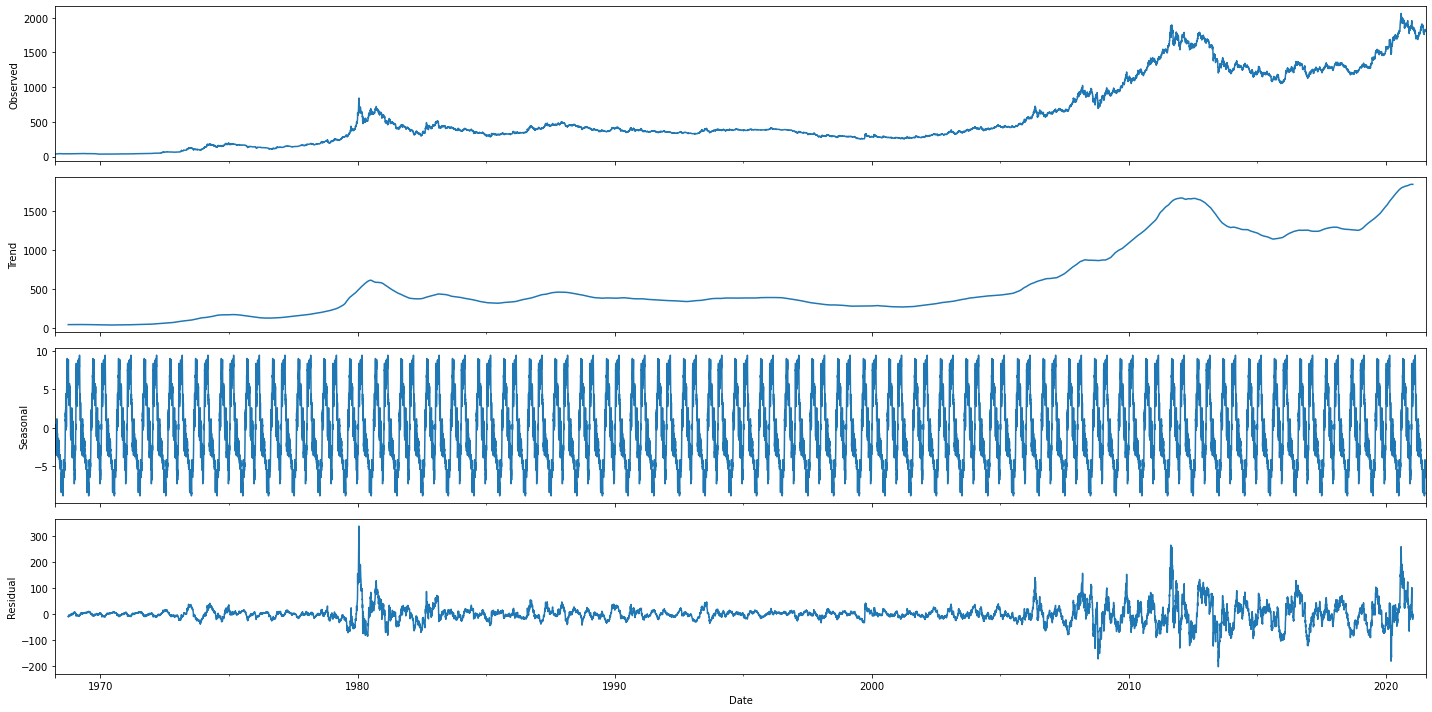

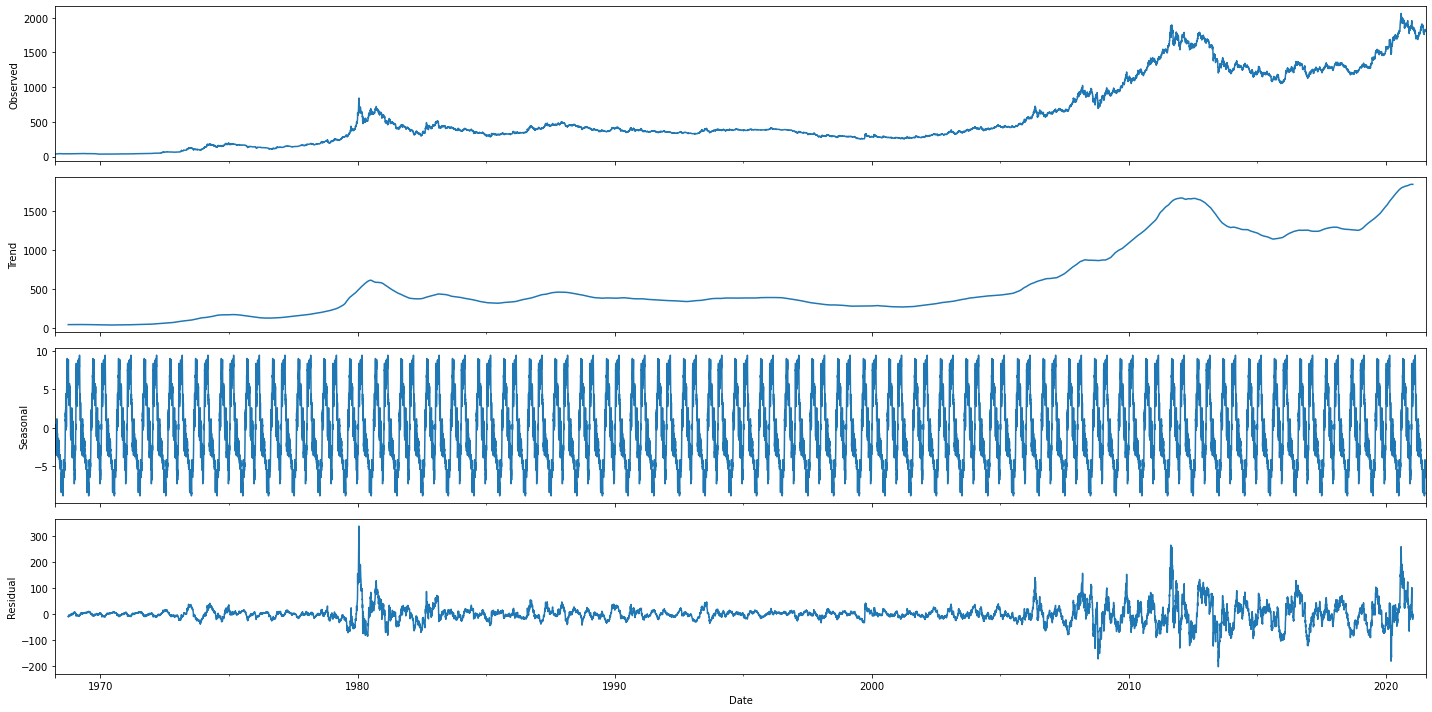

In [24]:
additive_try = seasonal_decompose(df.gold, model="additive", freq=365)

additive_try.plot()

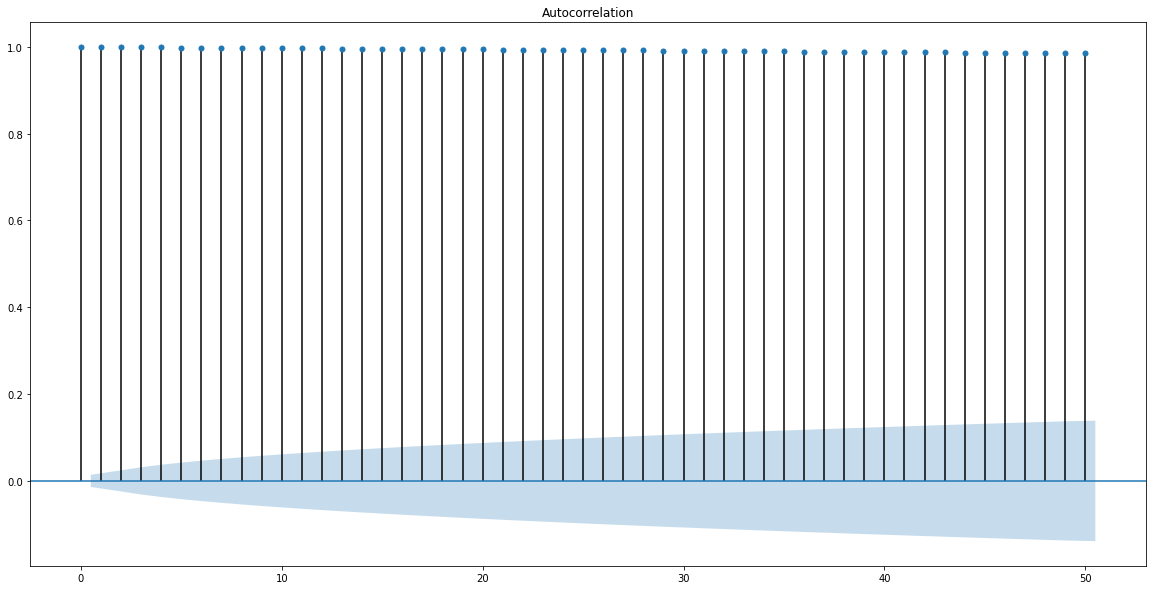

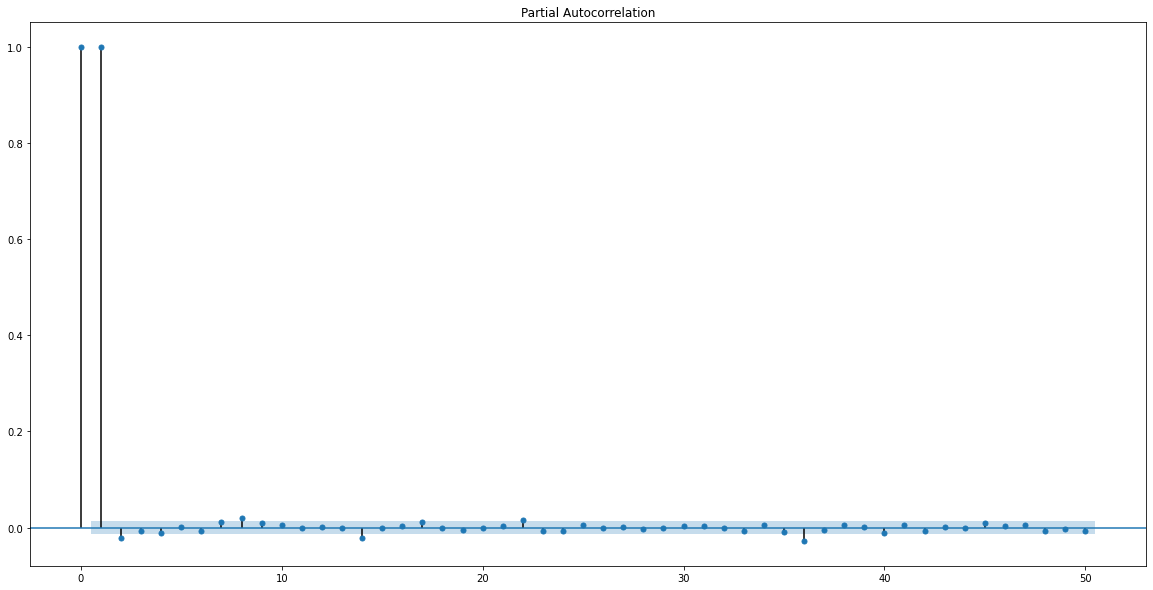

In [26]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.gold,lags=50)
tsa_plots.plot_pacf(df.gold,lags=50)
plt.show()


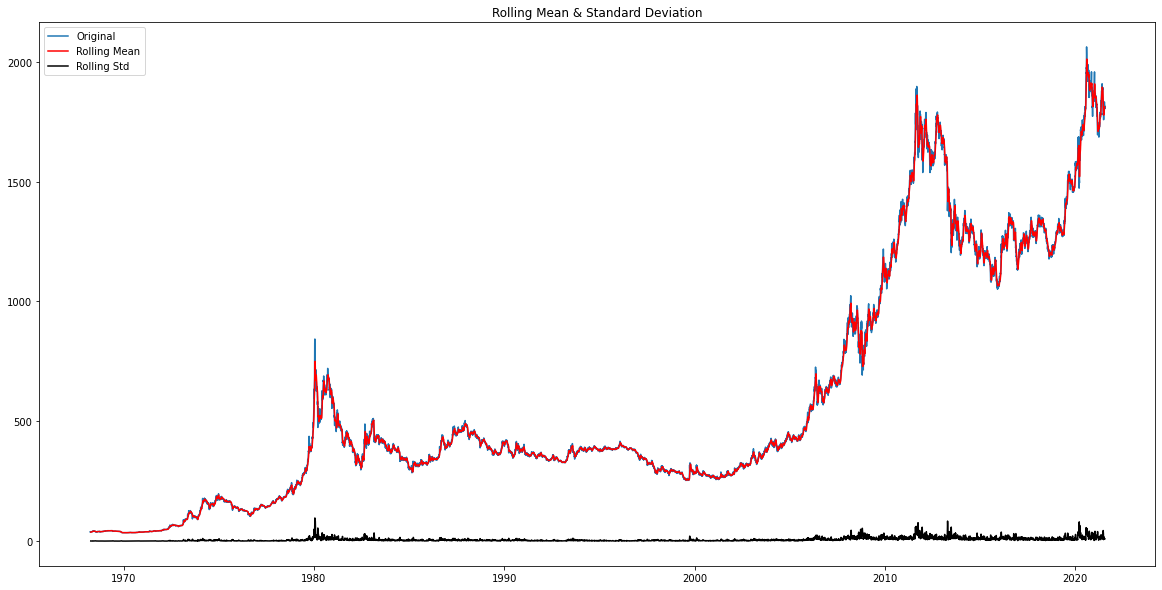

In [27]:
# Determing rolling statistics
rolmean = df.gold.rolling(window=12).mean()
rolstd = df.gold.rolling(window=12).std()

# Plot rolling statistics:
orig = plt.plot(df.gold, label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [28]:
X = df.gold.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.463277
p-value: 0.983713
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567



here p value is greater than 0.05 Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.



In [30]:
#train = df1.iloc[0:int(80*df.shape[0]/100)]
#test = df1.iloc[int(80*df.shape[0]/100):]

#print('Observations: %d' % (len(df1)))
#print('Training Observations: %d' % (len(train)))
#print('Testing Observations: %d' % (len(test)))

Observations: 19470
Training Observations: 15576
Testing Observations: 3894


**Difference transform**

In [29]:
def difference(dataset, interval=1, order=1):
    for u in range(order):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        dataset = diff
    return diff

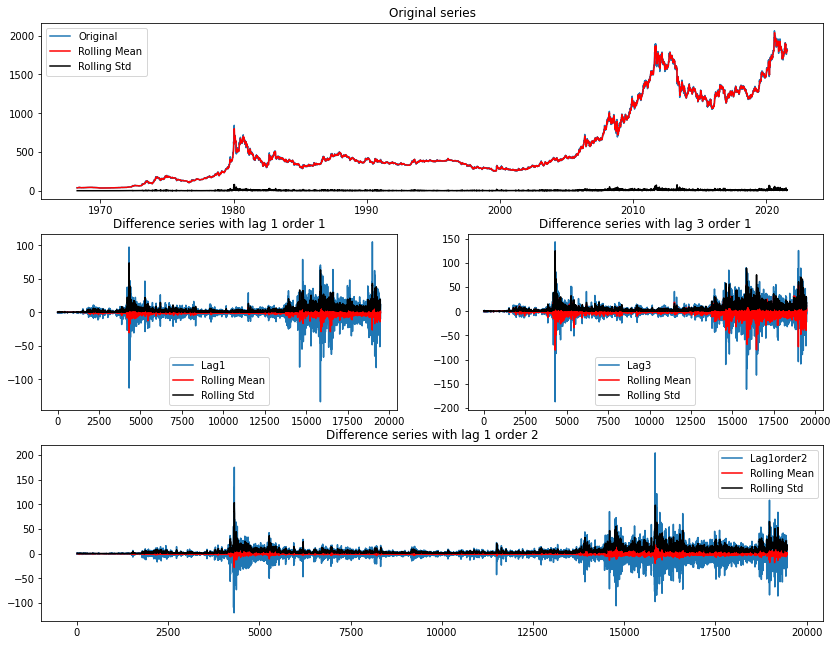

In [30]:

lag1series = pd.Series(difference(df.gold, interval=1, order=1))
lag3series = pd.Series(difference(df.gold, interval=3, order=1))
lag1order2series = pd.Series(difference(
    df.gold, interval=1, order=2))

fig = plt.figure(figsize=(14, 11))
layout = (3, 2)
original = plt.subplot2grid(layout, (0, 0), colspan=2)
lag1 = plt.subplot2grid(layout, (1, 0))
lag3 = plt.subplot2grid(layout, (1, 1))
lag1order2 = plt.subplot2grid(layout, (2, 0), colspan=2)

original.set_title('Original series')
original.plot(df.gold, label='Original')
original.plot(df.gold.rolling(
    7).mean(), color='red', label='Rolling Mean')
original.plot(df.gold.rolling(7).std(),
              color='black', label='Rolling Std')
original.legend(loc='best')

lag1.set_title('Difference series with lag 1 order 1')
lag1.plot(lag1series, label="Lag1")
lag1.plot(lag1series.rolling(7).mean(), color='red', label='Rolling Mean')
lag1.plot(lag1series.rolling(7).std(), color='black', label='Rolling Std')
lag1.legend(loc='best')

lag3.set_title('Difference series with lag 3 order 1')
lag3.plot(lag3series, label="Lag3")
lag3.plot(lag3series.rolling(7).mean(), color='red', label='Rolling Mean')
lag3.plot(lag3series.rolling(7).std(), color='black', label='Rolling Std')
lag3.legend(loc='best')

lag1order2.set_title('Difference series with lag 1 order 2')
lag1order2.plot(lag1order2series, label="Lag1order2")
lag1order2.plot(lag1order2series.rolling(7).mean(),
                color='red', label='Rolling Mean')
lag1order2.plot(lag1order2series.rolling(7).std(),
                color='black', label='Rolling Std')
lag1order2.legend(loc='best')

Text(0.5, 1.0, 'Log scale transformation into original series')

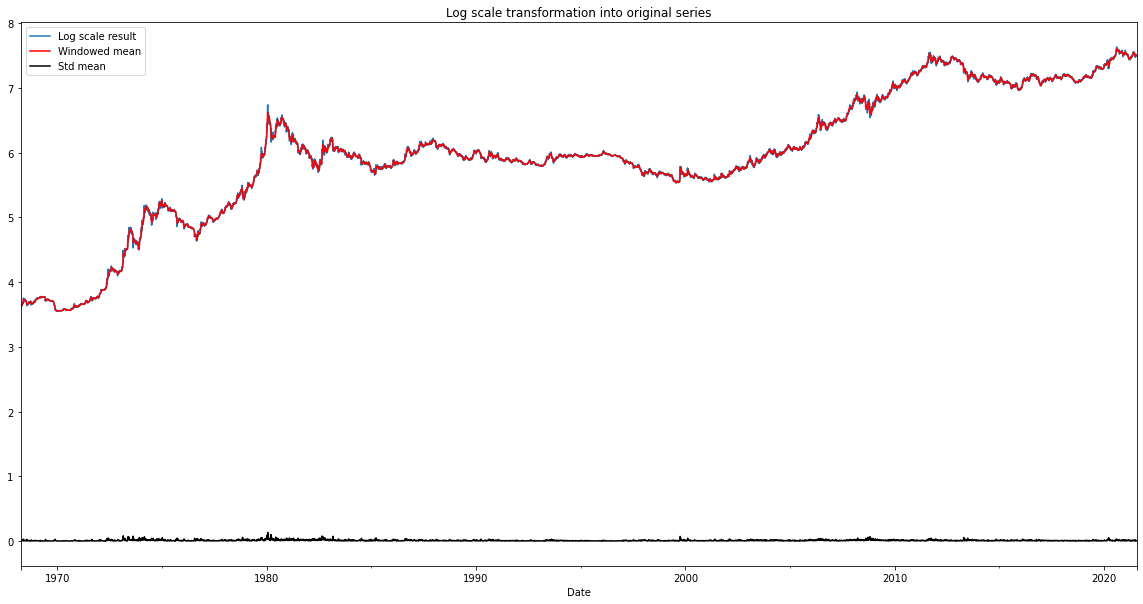

In [31]:
ts_log = np.log(df.gold)
ts_log.plot(label='Log scale result')
ts_log.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_log.rolling(window=12).std().plot(color='black', label='Std mean')
plt.legend()
plt.title('Log scale transformation into original series')

# smoothing

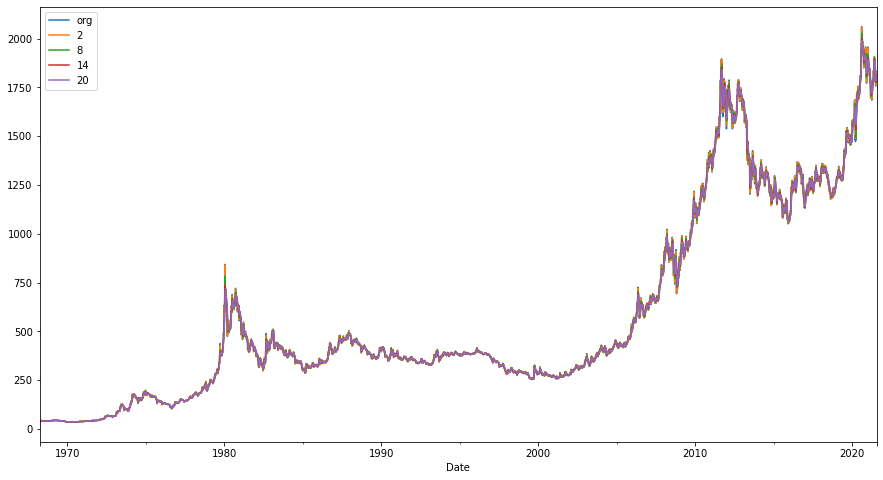

In [32]:
plt.figure(figsize=(15,8))
df.gold.plot(label="org")
for i in range(2,24,6):
    df["gold"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [55]:
model_train=df.iloc[:int(df.shape[0]*0.80)]
valid=df.iloc[int(df.shape[0]*0.80):]
y_pred=valid.copy()

In [60]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 7.6 MB/s 
     |████████████████████████████████| 9.5 MB 28.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [62]:
from pmdarima import auto_arima
model_scores_r2=[]
model_scores_mse=[]
model_scores_rmse=[]
model_scores_mae=[]
model_scores_rmsle=[]
model_arima= auto_arima(model_train["Close"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
              suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Close"])

ImportError: ignored